In [1]:
#Refer to this blog: https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Numpy Array

In [3]:
a = np.array([[1,2],[3,4]])
b = np.array([[1,1],[1,1]])
print(f"a={a} and\n b={b}\n")

#Array sum
c=a+b
print(f"a+b={c}\n")

#Array subtraction
d=a-b
print(f"a-b={d}\n")


a=[[1 2]
 [3 4]] and
 b=[[1 1]
 [1 1]]

a+b=[[2 3]
 [4 5]]

a-b=[[0 1]
 [2 3]]



**Multiplication of arrays**:

Can be done in two ways:

**1)** direct multiplication: multiply the elements in the same position of the array (**axb**)

**2)** dot product: matrix multiplication, i.e., **line * column**= a11b11+a12b21+a13b31 (**np.dot(a,b)**)



In [4]:
#Example #1
c=a*b
print(f"direct multiplication\n a*b={c}")

#Example #2
c=np.dot(a,b)

print(f"dot product\n a.b={c}")


direct multiplication
 a*b=[[1 2]
 [3 4]]
dot product
 a.b=[[3 3]
 [7 7]]


# Linear Regression Cost Function


The hypothesis of linear regression is defined as:

\begin{equation}
h_{\theta}(x^{(i)})=\theta_0x_0^{(i)}+\theta_1x_1^{(i)}+...+\theta_jx_j^{(i)}
\end{equation}

The cost function (CF) of linear regression is defined as:
\begin{equation}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 
\end{equation}

The CF's partial derivative to each $\theta$ is:
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}).x_j^{(i)}
\end{equation}

For each iteration $\theta$ updates as:
\begin{equation}
\theta_j: = \theta_j -\alpha \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}
\end{equation}


The dataset we used is ‘Boston Housing’ from UCI Machine Leraning Repository. It used the features like house area size, built year etc. to predict the house price in Boston area

In [5]:
data = pd.read_csv('dataset/housing.csv', encoding = "ISO-8859-1")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Data has 506 entries, we denote it as **m**.

Data has 14 columns, i.e., **n=14** features.


In [7]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
#Apply some data normalization

def normal(x:list):
    maxi = max(x)
    mini = min(x)
    avg = np.mean(x)
    new = [(i-avg)/(maxi-mini) for i in x ]
    
    return new

df = data.copy()
df = df.apply(normal, axis=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729,0.032604
1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939,-0.020729
2,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943,0.270382
3,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021,0.241493
4,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071,0.303715


In [9]:
Xd = df.drop(columns=['medv'])
Xd.insert(0, 'X0', 1)
Xd.head()

,X0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729
1,1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939
2,1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943
3,1,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021
4,1,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071


In [10]:
X = Xd.values
y = df.medv.values

m=len(df.index)
n=X.shape[1]
print(m,n)

506 14


Comparison between **For Loop** and **Vectorization**

### Hypothesis implementation FOR LOOP

The data set will be our hypothesis. We have 506 samples of data with 14 features each.

In [11]:
#Initialize theta
theta=np.ones(n)

In [12]:
# hypothesis for the first sample
hypo = 0
for j in range(n):
    hypo += theta[j]*X[0,j]

In [13]:
%%time
#hypothesis for all the samples
all_hypo=[]
for i in range(m):
    hypo_i = 0
    for j in range(n):
        hypo_i += theta[j]*X[i,j]
    all_hypo.append(hypo_i)

CPU times: user 11.3 ms, sys: 0 ns, total: 11.3 ms
Wall time: 11 ms


In [14]:
all_hypo

[-0.3854619236396593,
 -0.020199015971414436,
 -0.20839437418549767,
 -0.4285241987963731,
 -0.24138047295937531,
 -0.3431809297992675,
 0.16992431241733566,
 0.7291974106276335,
 0.9499840269978372,
 0.5683291899121906,
 0.8116982482768587,
 0.42458318714377297,
 -0.07014343440672327,
 0.4047633135547745,
 0.6570915533222461,
 0.3116897419811221,
 -0.018553662065734472,
 0.729696753646631,
 -0.20757776894470306,
 0.42809411381766477,
 0.9310965152295133,
 0.7719712662650017,
 0.9786423037925016,
 1.0351548715696275,
 0.9213493682217324,
 0.5551440263793039,
 0.8006293421388554,
 0.7028071672881852,
 0.9264217512283982,
 0.8284953174750775,
 0.9577523262708191,
 0.862504144990133,
 0.6786721200575874,
 0.8036142426152384,
 0.6779379934598004,
 0.01632274697069447,
 -0.07039129990623946,
 -0.2472983778379242,
 -0.31950444747475354,
 -0.04128298547670434,
 -0.0854030604688038,
 -0.8261143209659993,
 -0.881385380418785,
 -0.8012249678206881,
 -0.43840160565384,
 -0.5951338892892255,
 -0.4

### Hypothesis implementation VECTORIZATION

The hypothesis of each sample can be vectorized using the following formula:

$$h_{\theta}(x^{(i)})=\theta^Tx^{(i)}=\matrix{\pmatrix{\theta_0 & \theta_1 & ... & \theta_n}}\pmatrix{x_0^{(i)}\cr x_1^{(i)}\cr ...\cr x_n^{(i)}\cr}$$


Although for all the samples as a list (m=596) we use the following array **dot product**:


$$h_{\theta}(x)=X\theta=
\begin{pmatrix}
 x_0^{(1)} & x_1^{(1)} & ... & x_n^{(1)}\\
 x_0^{(2)} & x_1^{(2)} & ... & x_n^{(2)}\\
 \vdots & \vdots & ... & \vdots\\
 x_0^{(m)} & x_1^{(m)} & ... & x_n^{(m)}\\
\end{pmatrix}
\times
\begin{pmatrix}
 \theta_0\\
 \theta_1\\
 \vdots\\
 \theta_n\\
\end{pmatrix}
$$

In [15]:
%%time
#To exectutre the above equation
hypo=X@theta

CPU times: user 128 µs, sys: 39 µs, total: 167 µs
Wall time: 115 µs


### Cost Functions FOR LOOP

\begin{equation}
h_{\theta}(x^{(i)})=\theta_0x_0^{(i)}+\theta_1x_1^{(i)}+...+\theta_jx_j^{(i)}
\end{equation}


\begin{equation}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 
\end{equation}

In [16]:
%%time
# cost function
cost = 0
for i in range(m):
    hypo_i = 0
    for j in range(n):
        hypo_i += theta[j]*X[i,j]
    cost_i = (hypo_i - y[i])**2
    cost += cost_i
cost = (1/(2*m))*cost
print(cost)

1.399752908228425
CPU times: user 7.19 ms, sys: 0 ns, total: 7.19 ms
Wall time: 7.12 ms


In [17]:
def cost_loop(theat = theta, x=X, y=y, m=m, n=n):
    cost = 0
    for i in range(m):
        hypo_i = 0
        for j in range(n):
            hypo_i += theta[j]*X[i,j]
        cost_i = (hypo_i - y[i])**2
        cost += cost_i
    cost = (1/(2*m))*cost
    
    return cost

In [18]:
cost_loop()

1.399752908228425

### Cost Functions VECTORIZATION


\begin{equation}
J(\theta) = \frac{1}{2m} (X\theta-y)^T(X\theta-y) 
\end{equation}

In [19]:
%%time
#cost function
cost=(1/(2*m))*np.transpose((X@theta -y))@(X@theta-y)
print(cost)

1.3997529082284241
CPU times: user 358 µs, sys: 106 µs, total: 464 µs
Wall time: 447 µs


### Derivation Implementation


Derivative

\begin{equation}
    \frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1)
\end{equation}
where,
\begin{equation}
    J(\theta_0,\theta_1)=\frac{1}{2m}\sum^m_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})^2.
\end{equation}

For j=0:
\begin{equation}
    \frac{\partial}{\partial\theta_0}J(\theta_0,\theta_1)=\frac{1}{m}\sum^m_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})
\end{equation}
For j=1
\begin{equation}
    \frac{\partial}{\partial\theta_0}J(\theta_0,\theta_1)=\frac{1}{m}\sum^m_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})\cdot x^{(i)}
\end{equation}

### FOR LOOP (derivatire implementation)

In [20]:
%%time

#derivation for only one variable theta
dev_sum = 0
for i in range(m):
    hypo_i = 0
    for j in range(n):
        hypo_i += theta[j]*X[i,j]
    dev_i = (hypo_i - y[i])*X[i,k]
    dev_sum += dev_i
dev_sum = (1/m)*dev_sum

NameError: name 'k' is not defined

In [21]:
%%time

#derivation to all thetas
#another for loop to iterate over all the columns

dev_list = []
for k in range(n):#iterate over columns
    dev_sum = 0
    for i in range(m):#iterate over lines
        hypo_i = 0
        for j in range(n):
            hypo_i += theta[j]*X[i,j]
        dev_i = (hypo_i - y[i])*X[i,k]
        dev_sum += dev_i
    dev_sum = (1/m)*dev_sum
    
    dev_list.append(dev_sum)

CPU times: user 57.6 ms, sys: 0 ns, total: 57.6 ms
Wall time: 57 ms


In [22]:
print(dev_list)

[0.9999999999999983, 0.07814620360307895, -0.11042922261438312, 0.2620302340552936, 0.05504439083525137, 0.23892542562534522, -0.06454255823702795, 0.2611634394125097, -0.1453677181065729, 0.43106386997897883, 0.38303455280215737, 0.16591512402899725, -0.09920797306076046, 0.1835280968258358]


### VECTORIZATION (derivatire implementation)


Derivation vectorized to **each** theta:
\begin{equation}
        \frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{m}(x_j)^T(X\theta-y)
\end{equation}

Derivation vectorized to **all** theta:
\begin{equation}
        \frac{\partial}{\partial\theta}J(\theta)=\frac{1}{m}X^T(X\theta-y)
\end{equation}


In [23]:
%%time
dev = (1/m)*np.transpose(X)@(X@theta - y)

CPU times: user 174 µs, sys: 49 µs, total: 223 µs
Wall time: 279 µs


In [24]:
dev

array([ 1.        ,  0.0781462 , -0.11042922,  0.26203023,  0.05504439,
        0.23892543, -0.06454256,  0.26116344, -0.14536772,  0.43106387,
        0.38303455,  0.16591512, -0.09920797,  0.1835281 ])

# Gradient descent iteration
#### Utilize all the above developed rotines

### GD FOR LOOP
iteration times = 100000
learning rate = 0.0005
thetas = 1

### CAUTION: IT TAKES OVER HOUR. 

In [25]:
# %%time
# a = 0.0005
# theta = np.ones(n)
# cost_list = []

# for itr in range(100000):
#     dev_list = []
#     for k in range(n):
#         dev_sum = 0
#         for i in range(m):
#             hypo_i = 0
#             for j in range(n):
#                 hypo_i += theta[j]*X[i,j]
#             dev_i = (hypo_i - y[i])*X[i,k]
#             dev_sum += dev_i
#         dev_sum = (1/m)*dev_sum
#     dev_list.append(dev_sum)
#     theta = theta - a*np.array(dev_list)
#     cost_val = cost_loop(theta)
#     cost_list.append(cost_val)
# print(cost_list)

### GD VECTORIZATION
iteration times = 100000
learning rate = 0.0005
thetas = 1


In [33]:
def cost(theta, X=X, y=y, m=m):
    cost = np.transpose((X@theta - y))@(X@theta - y)
    cost = (1/(2*m))*cost
    return cost

In [34]:
%%time
a = 0.0005
theta = np.ones(n)

cost_list = []

for i in range(100000):
    theta = theta - a*(1/m)*np.transpose(X)@(X@theta - y)
           
    cost_val = cost(theta)
    cost_list.append(cost_val)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 14)

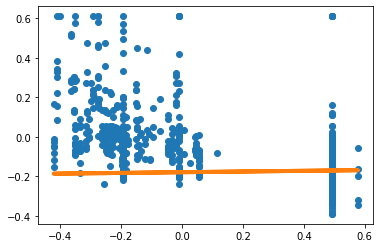

In [29]:
variable_n=10
plt.figure()
plt.plot(X[:,variable_n],y,'o')
plt.plot(X[:,variable_n], cost_val*X[:,variable_n] + theta[variable_n],linewidth=4)
plt.show()